In [34]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import plotly.express as px
import seaborn as sns

## Initial data inspection

In [60]:
df = pd.read_csv('data.csv') 

In [15]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [17]:
df.shape

(705, 13)

In [18]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [19]:
df.describe(include='object')

,Gender,Academic_Level,Country,Most_Used_Platform,Affects_Academic_Performance,Relationship_Status
count,705,705,705,705,705,705
unique,2,3,110,12,2,3
top,Female,Undergraduate,India,Instagram,Yes,Single
freq,353,353,53,249,453,384


In [20]:
df.duplicated().sum()

0

In [21]:
df.nunique()

Student_ID                      705
Age                               7
Gender                            2
Academic_Level                    3
Country                         110
Avg_Daily_Usage_Hours            67
Most_Used_Platform               12
Affects_Academic_Performance      2
Sleep_Hours_Per_Night            59
Mental_Health_Score               6
Relationship_Status               3
Conflicts_Over_Social_Media       6
Addicted_Score                    8
dtype: int64

In [22]:
numeric_cols = [col for col in df.columns if df[col].dtype != 'object' and col != 'Student_ID']
numeric_cols

['Age',
 'Avg_Daily_Usage_Hours',
 'Sleep_Hours_Per_Night',
 'Mental_Health_Score',
 'Conflicts_Over_Social_Media',
 'Addicted_Score']

In [23]:
categoric_cols = [col for col in df.columns if df[col].dtype == 'object']
categoric_cols

['Gender',
 'Academic_Level',
 'Country',
 'Most_Used_Platform',
 'Affects_Academic_Performance',
 'Relationship_Status']

#### Observations
- There are no missing values in the dataset. 
- The dataset contains a mix of numeric and categorical columns.
- Numeric values are represented as both floats and integers.
- The "Country" column has 110 unique values, which may require grouping or simplification for analysis.

## Univariate analysis

In [24]:
def plot_column_distribution(df, col):
    """Plot the distribution of a numeric column."""
    plt.figure(figsize=(6, 4))
    df[col].hist(bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

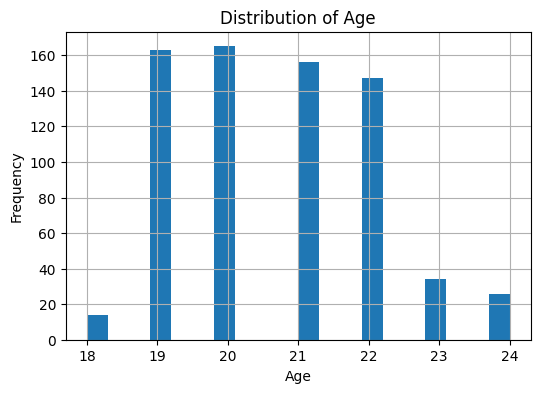

In [25]:
plot_column_distribution(df, 'Age')

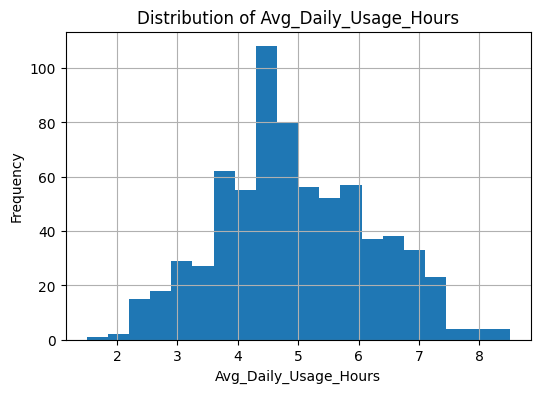

In [26]:
plot_column_distribution(df, 'Avg_Daily_Usage_Hours')

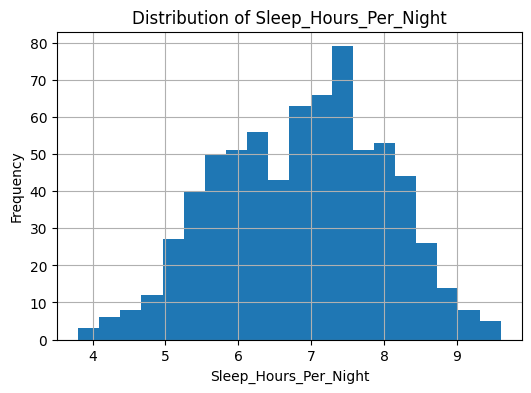

In [27]:
plot_column_distribution(df, 'Sleep_Hours_Per_Night')

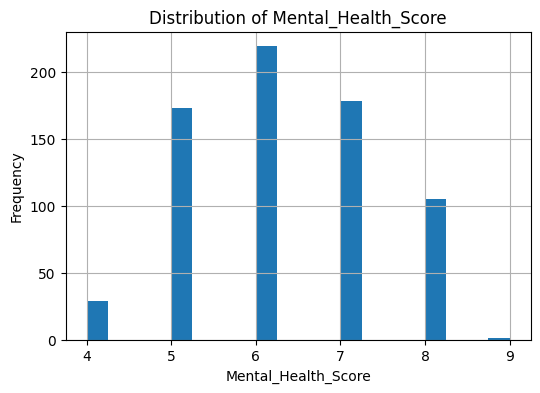

In [28]:
plot_column_distribution(df, 'Mental_Health_Score')

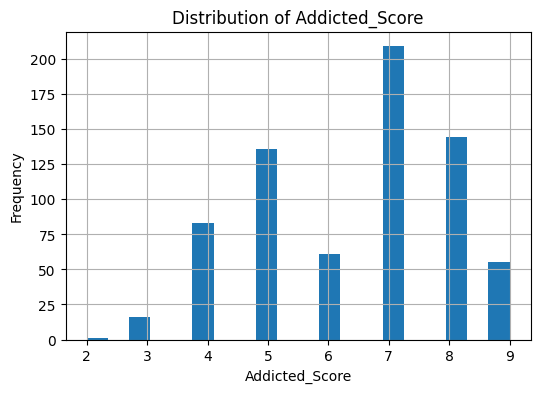

In [29]:
plot_column_distribution(df, 'Addicted_Score')

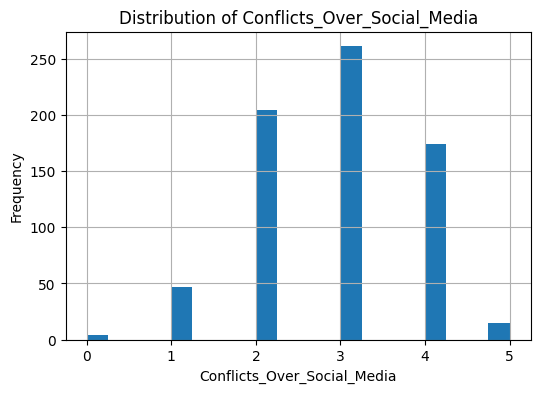

In [30]:
plot_column_distribution(df, 'Conflicts_Over_Social_Media')

In [31]:
def plot_countplot(df, col, skewed=False, angle=45):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    if skewed:
        plt.xticks(rotation=angle, ha='right')  # Rotate if skewed=True
    plt.tight_layout()
    plt.show()

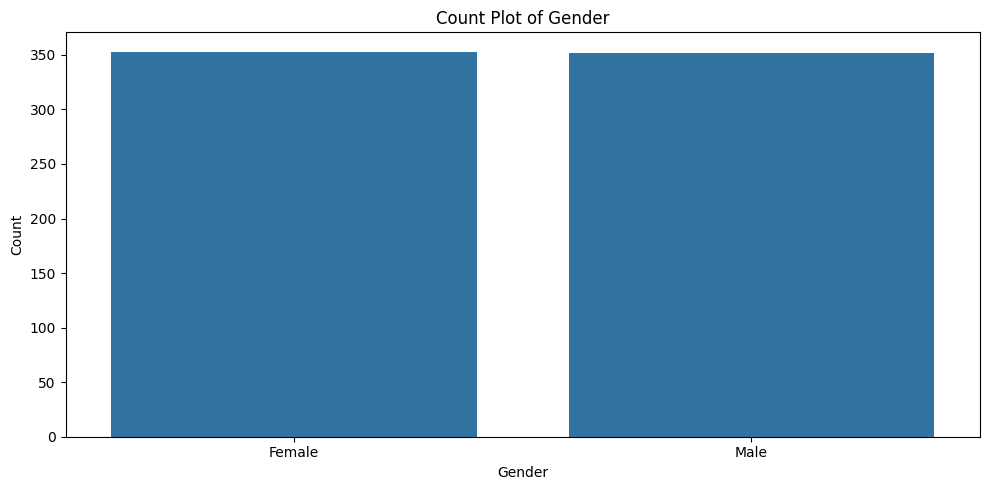

In [35]:
plot_countplot(df, 'Gender')

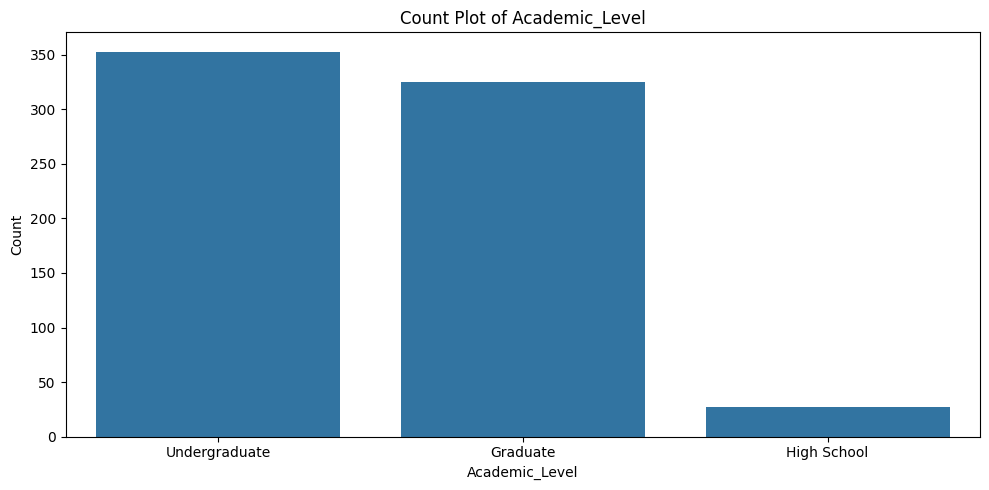

In [36]:
plot_countplot(df, 'Academic_Level')

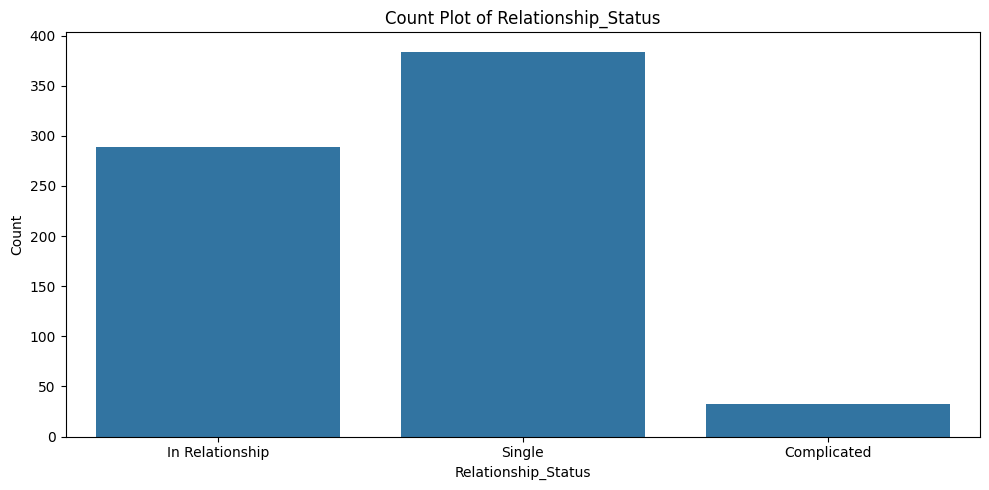

In [37]:
plot_countplot(df, 'Relationship_Status')

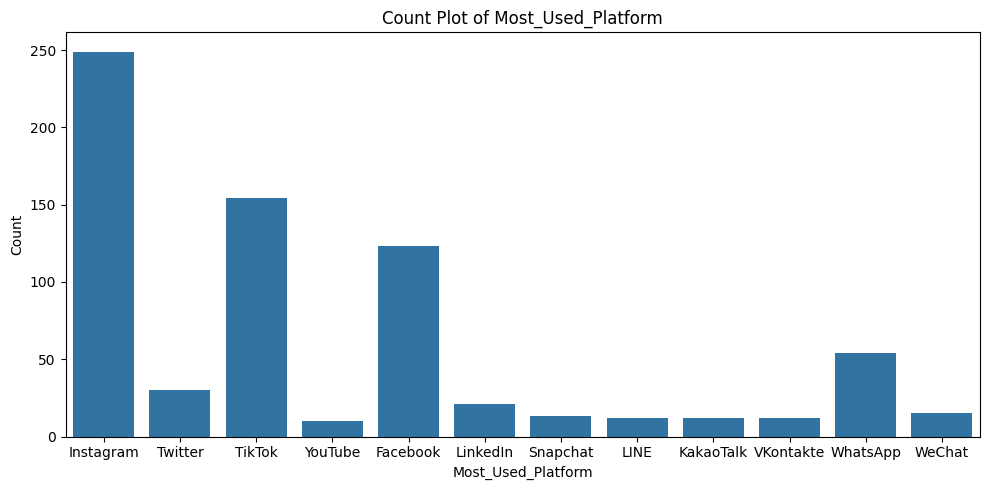

In [38]:
plot_countplot(df, 'Most_Used_Platform')

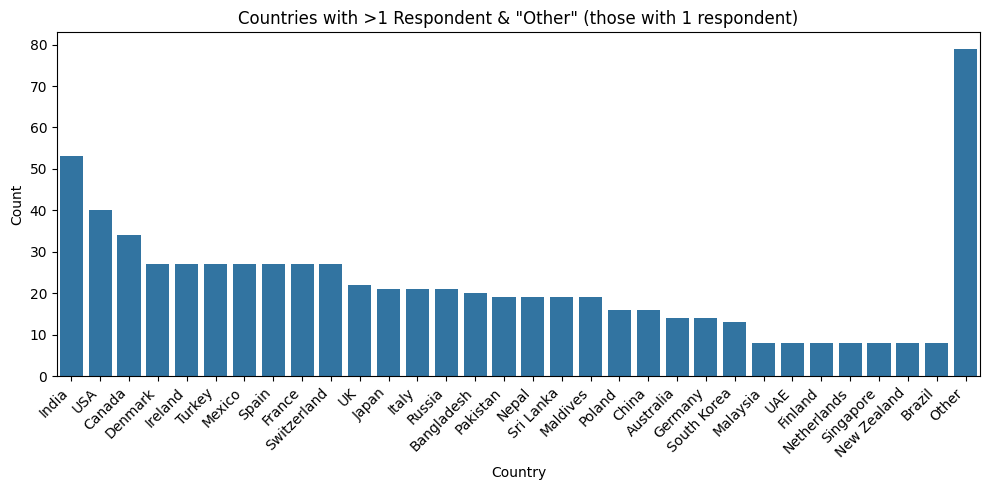

In [39]:
# Country counts
country_counts = df['Country'].value_counts()

# Main countries (with >1 respondent)
main_countries = country_counts[country_counts > 1]

# Countries with only 1 representative
one_rep_countries = country_counts[country_counts == 1]
other_count = one_rep_countries.sum()

# Combine using pd.concat
plot_data = pd.concat([main_countries, pd.Series({'Other': other_count})])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=plot_data.index, y=plot_data.values)
plt.title('Countries with >1 Respondent & "Other" (those with 1 respondent)')
plt.ylabel('Count')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')  # <--- This skews the labels
plt.tight_layout()
plt.show()

In [25]:
pd.set_option('display.max_rows', 111)  # The number should be larger than  unique country count

print(df['Country'].value_counts())

Country
India              53
USA                40
Canada             34
Denmark            27
Ireland            27
Turkey             27
Mexico             27
Spain              27
France             27
Switzerland        27
UK                 22
Japan              21
Italy              21
Russia             21
Bangladesh         20
Pakistan           19
Nepal              19
Sri Lanka          19
Maldives           19
Poland             16
China              16
Australia          14
Germany            14
South Korea        13
Malaysia            8
UAE                 8
Finland             8
Netherlands         8
Singapore           8
New Zealand         8
Brazil              8
Kazakhstan          1
Uzbekistan          1
Andorra             1
Belarus             1
Ukraine             1
Kyrgyzstan          1
Moldova             1
Tajikistan          1
Armenia             1
Lithuania           1
Georgia             1
Azerbaijan          1
Cyprus              1
Malta               1
Lu

#### Observations

- The age distribution shows most respondents are in the typical student age range (19-22), with a few outliers.
- The distribution of average daily usage hours of social media  is normal, with a majority of students spending 4.5 a day using them.
- The distribution of sleep hours per night is a bit left-skewed with the majority of students sleeping less than 7 hours.
- Mental health, addiction scores and the number of conflicts vary, with a tendency toward moderate values, but some students have high scores indicating potential issues.
- Gender distribution shows a balanced representation.
- In the academic level and relationship status distributions  some categories dominate. 
- The "Most Used Platform" plot reveals a few platforms are much more popular than others.
- The country distribution is highly imbalanced, with a few countries contributing most responses and many countries represented by only one respondent, we may need to group some countires to avoid noice or overfitting.


## Bivariate/Multivariate Analysis

## Correlation Analysis
Let's create a correlation matrix to understand the relationships between numeric variables in our dataset.

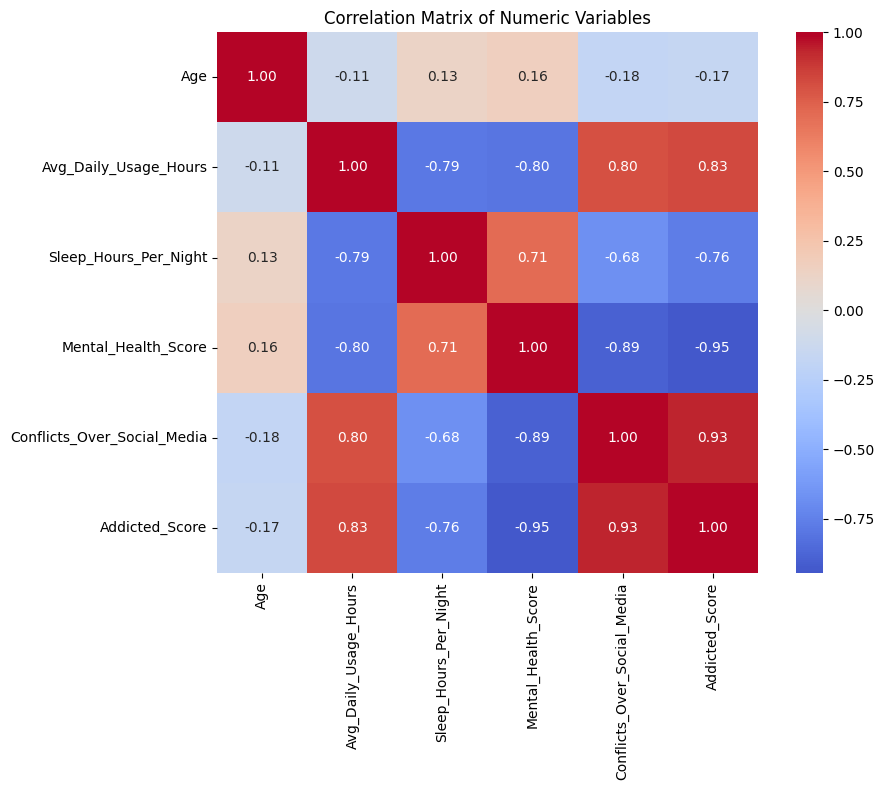

In [40]:
# Create correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_cols].corr()

# Create heatmap
sns.heatmap(corr_matrix, 
            annot=True,  # Add correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Format correlation values to 2 decimal places
            square=True)  # Make the plot square

plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

#### Observations

- The correlation matrix for numeric variables shows that most features have moderate to high relationships. Notably, conflicts over social media , addiction score and average daily usage hours, as well as sleep hours and mental health score, display stronger correlations, suggesting possible behavioral or health-related links.
- Age appears largely independent from other numeric variables, indicating it may not be a strong predictor for most outcomes in this dataset.


#### Let's see if the relationships between the categorical variables and the target variables are statistically significant. 

In [41]:
results = []

for col in categoric_cols:
    table = pd.crosstab(df[col], df["Addicted_Score"])
    chi2, p, dof, expected = chi2_contingency(table)
    results.append({"variable": col, "chi2": chi2, "p_value": p, "significant": p < 0.05})

chi2_df = pd.DataFrame(results).sort_values("p_value")

chi2_df

,variable,chi2,p_value,significant
3,Most_Used_Platform,1088.234385,2.427291e-178,True
2,Country,2399.812276,2.529682e-168,True
4,Affects_Academic_Performance,653.609582,6.885766e-137,True
1,Academic_Level,99.207604,6.726480e-15,True
5,Relationship_Status,75.336705,2.052597e-10,True
0,Gender,42.605224,3.975247e-07,True


In [42]:
results = []

for col in categoric_cols:
    table = pd.crosstab(df[col], df["Conflicts_Over_Social_Media"])
    chi2, p, dof, expected = chi2_contingency(table)
    results.append({"variable": col, "chi2": chi2, "p_value": p, "significant": p < 0.05})

chi2_df = pd.DataFrame(results).sort_values("p_value")

chi2_df

,variable,chi2,p_value,significant
4,Affects_Academic_Performance,692.130353,2.470502e-147,True
3,Most_Used_Platform,706.475100,6.747197e-114,True
2,Country,1565.074803,2.791888e-99,True
1,Academic_Level,84.014959,8.162051e-14,True
5,Relationship_Status,72.822022,1.260698e-11,True
0,Gender,16.597647,5.329599e-03,True


In [59]:
df["Conflicts_Over_Social_Media"].value_counts()


Conflicts_Over_Social_Media
high    450
low     255
Name: count, dtype: int64

In [44]:
def plot_cramers_v_heatmap(df, target_col='y', target_mapping=None, figsize=(12, 10), cmap="YlGnBu"):
    """
    Computes pairwise Cramér's V for all categorical columns (including the target)
    and plots a heatmap.

    Parameters:
      df : pandas.DataFrame
          DataFrame containing your data.
      target_col : str, optional
          Name of the target column to be converted to categorical (default is 'y').
      target_mapping : dict, optional
          Mapping for the target column (e.g., {0: "no", 1: "yes"}). If provided,
          the target column is mapped using this dictionary before converting to object.
      figsize : tuple, optional
          Figure size for the heatmap plot.
      cmap : str, optional
          Colormap to be used in the heatmap.

    Returns:
      cramer_matrix : pandas.DataFrame
          DataFrame containing the pairwise Cramér's V values.
    """
    
    # Convert the target column to categorical using the provided mapping if available
    if target_mapping is not None:
        df[target_col] = df[target_col].map(target_mapping).astype("object")
    else:
        df[target_col] = df[target_col].astype("object")
    
    # Optionally create a temporary column (if needed) or use the converted target column directly.
    # Here we assume target_col is now categorical.
    
    # Select all categorical columns (object dtype)
    cat_cols = df.select_dtypes(include="object").columns
    
    # Define function to compute Cramér's V
    def cramers_v(x, y):
        confusion_matrix = pd.crosstab(x, y)
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        r, k = confusion_matrix.shape
        return np.sqrt(chi2 / (n * (min(k, r) - 1)))
    
    # Compute the pairwise Cramér’s V matrix
    cramer_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)
    for col1 in cat_cols:
        for col2 in cat_cols:
            cramer_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
    cramer_matrix = cramer_matrix.astype(float)
    
    # Plot heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(cramer_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)
    plt.title("Cramér’s V Heatmap (Categorical Features)")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return cramer_matrix

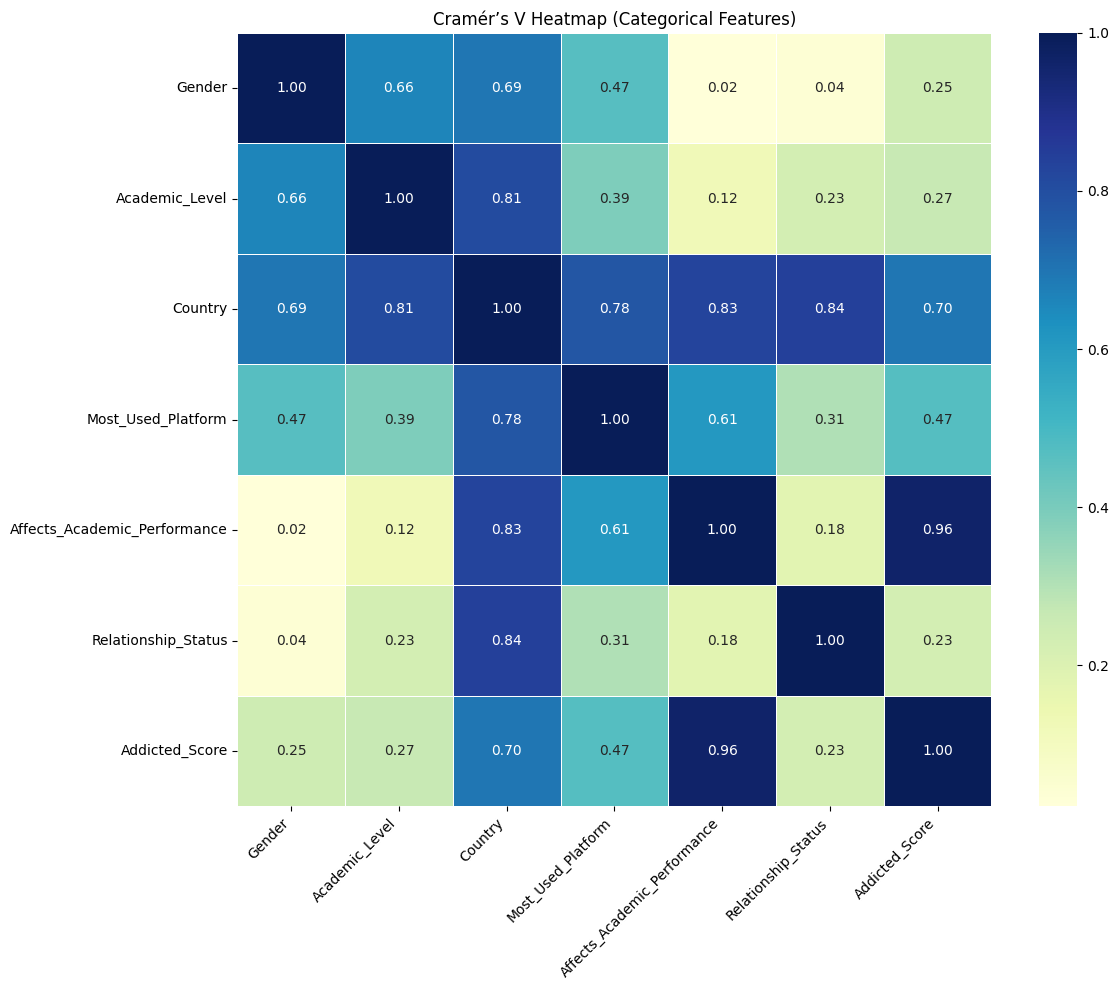

,Gender,Academic_Level,Country,Most_Used_Platform,Affects_Academic_Performance,Relationship_Status,Addicted_Score
Gender,0.997163,0.660608,0.694650,0.467869,0.021776,0.039200,0.245831
Academic_Level,0.660608,1.000000,0.810161,0.391531,0.123729,0.230095,0.265255
Country,0.694650,0.810161,1.000000,0.775379,0.831843,0.839951,0.697341
Most_Used_Platform,0.467869,0.391531,0.775379,1.000000,0.607663,0.307079,0.469589
Affects_Academic_Performance,0.021776,0.123729,0.831843,0.607663,0.996912,0.179496,0.962863
Relationship_Status,0.039200,0.230095,0.839951,0.307079,0.179496,1.000000,0.231150
Addicted_Score,0.245831,0.265255,0.697341,0.469589,0.962863,0.231150,1.000000


In [45]:
plot_cramers_v_heatmap(df, target_col='Addicted_Score')

In [73]:
df["Conflicts_Over_Social_Media_Binary"] = df["Conflicts_Over_Social_Media"].apply(lambda x: 0 if x <= 2 else 1).astype(int)

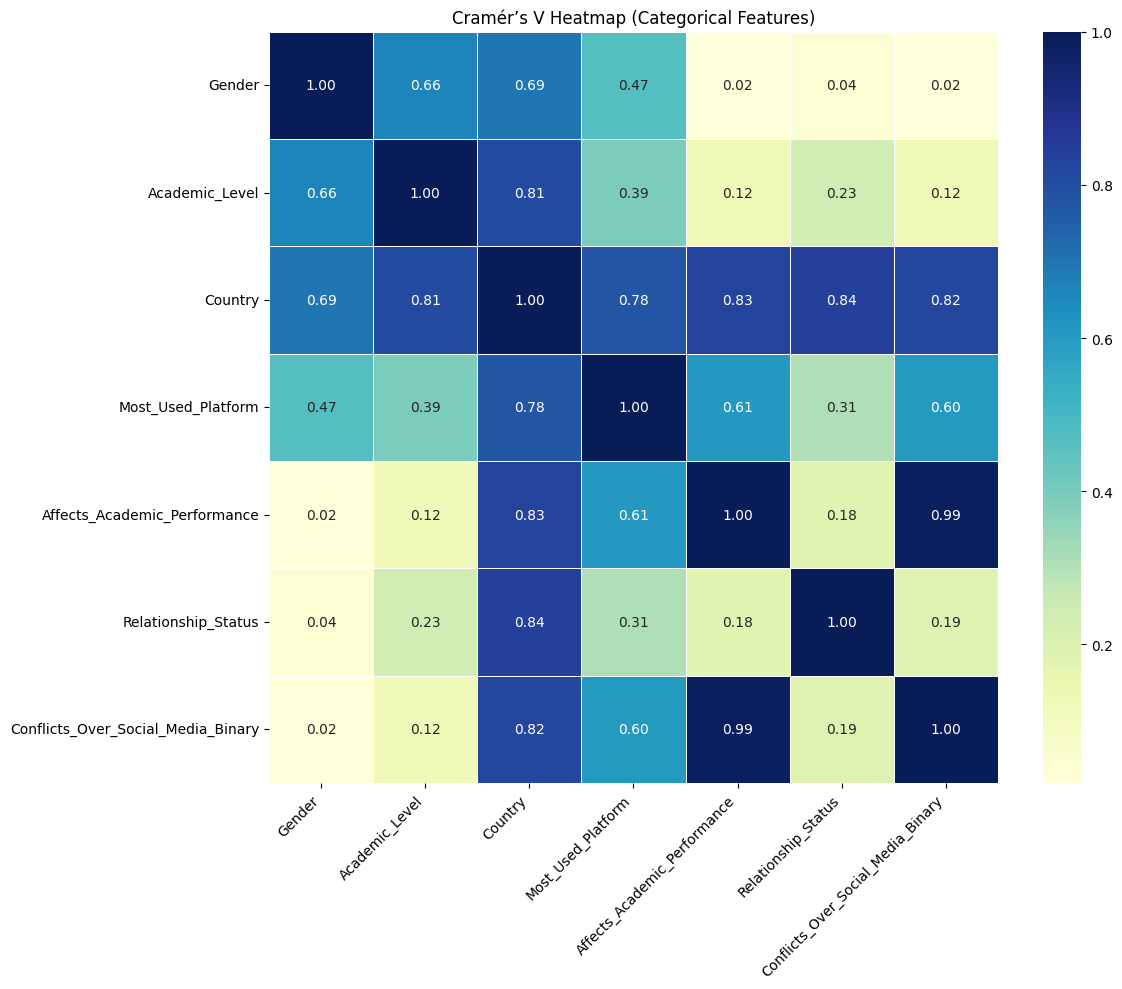

,Gender,Academic_Level,Country,Most_Used_Platform,Affects_Academic_Performance,Relationship_Status,Conflicts_Over_Social_Media_Binary
Gender,0.997163,0.660608,0.694650,0.467869,0.021776,0.039200,0.018780
Academic_Level,0.660608,1.000000,0.810161,0.391531,0.123729,0.230095,0.124337
Country,0.694650,0.810161,1.000000,0.775379,0.831843,0.839951,0.822596
Most_Used_Platform,0.467869,0.391531,0.775379,1.000000,0.607663,0.307079,0.604140
Affects_Academic_Performance,0.021776,0.123729,0.831843,0.607663,0.996912,0.179496,0.987723
Relationship_Status,0.039200,0.230095,0.839951,0.307079,0.179496,1.000000,0.189612
Conflicts_Over_Social_Media_Binary,0.018780,0.124337,0.822596,0.604140,0.987723,0.189612,0.996928


In [74]:
plot_cramers_v_heatmap(df, target_col='Conflicts_Over_Social_Media_Binary')

#### Observations

- The Cramér’s V heatmaps for categorical variables reveal that gender, academic level and relationship status have low correlation with the target variables (Addicted_Score, Conflicts_Over_Social_Media) .
- At the same time, the variable "Affects academit performance" has very high correlation with the target variables. 


## Pairwise Scatter Plots
Let's examine the relationships between:
- Average Daily Usage Hours vs Mental Health Score
- Average Daily Usage Hours vs Sleep Hours Per Night

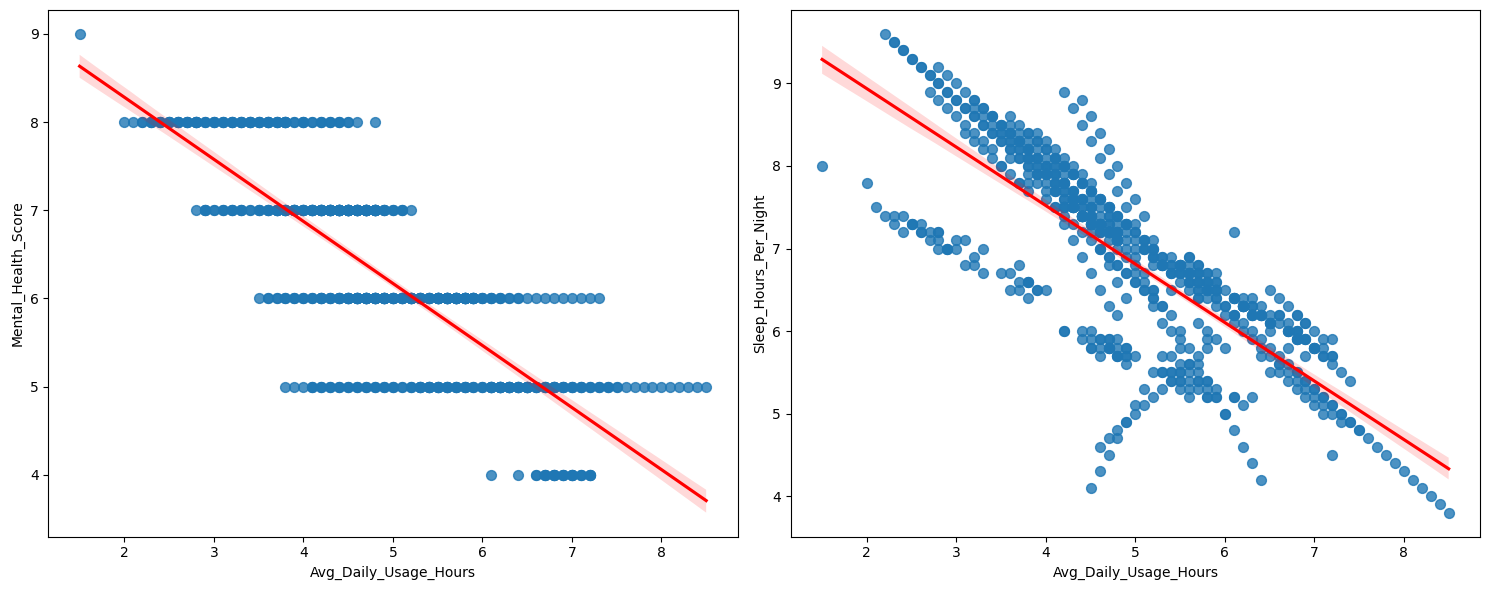


Correlations:
Daily Usage Hours vs Mental Health Score: -0.801
Daily Usage Hours vs Sleep Hours: -0.791


In [49]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Avg Daily Usage Hours vs Mental Health Score
sns.regplot(data=df, 
            x='Avg_Daily_Usage_Hours', 
            y='Mental_Health_Score',
            ax=ax1,
            scatter_kws={'s': 50},  # customize points
            line_kws={'color': 'red'})  # red trend line

# Plot 2: Avg Daily Usage Hours vs Sleep Hours
sns.regplot(data=df,
            x='Avg_Daily_Usage_Hours',
            y='Sleep_Hours_Per_Night',
            ax=ax2,
            scatter_kws={'s': 50},
            line_kws={'color': 'red'})

# Adjust layout
plt.tight_layout()
plt.show()

# Calculate correlations for these pairs
print('\nCorrelations:')
print(f'Daily Usage Hours vs Mental Health Score: {df["Avg_Daily_Usage_Hours"].corr(df["Mental_Health_Score"]):.3f}')
print(f'Daily Usage Hours vs Sleep Hours: {df["Avg_Daily_Usage_Hours"].corr(df["Sleep_Hours_Per_Night"]):.3f}')

## Average Daily Usage Hours Analysis
Let's analyze how average daily usage hours vary across different categories:
- By Country (top 5 countries)
- By Gender
- By Most Used Platform

C:\Users\Galyna\AppData\Local\Temp\ipykernel_13020\1219035887.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\Galyna\AppData\Local\Temp\ipykernel_13020\1219035887.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')


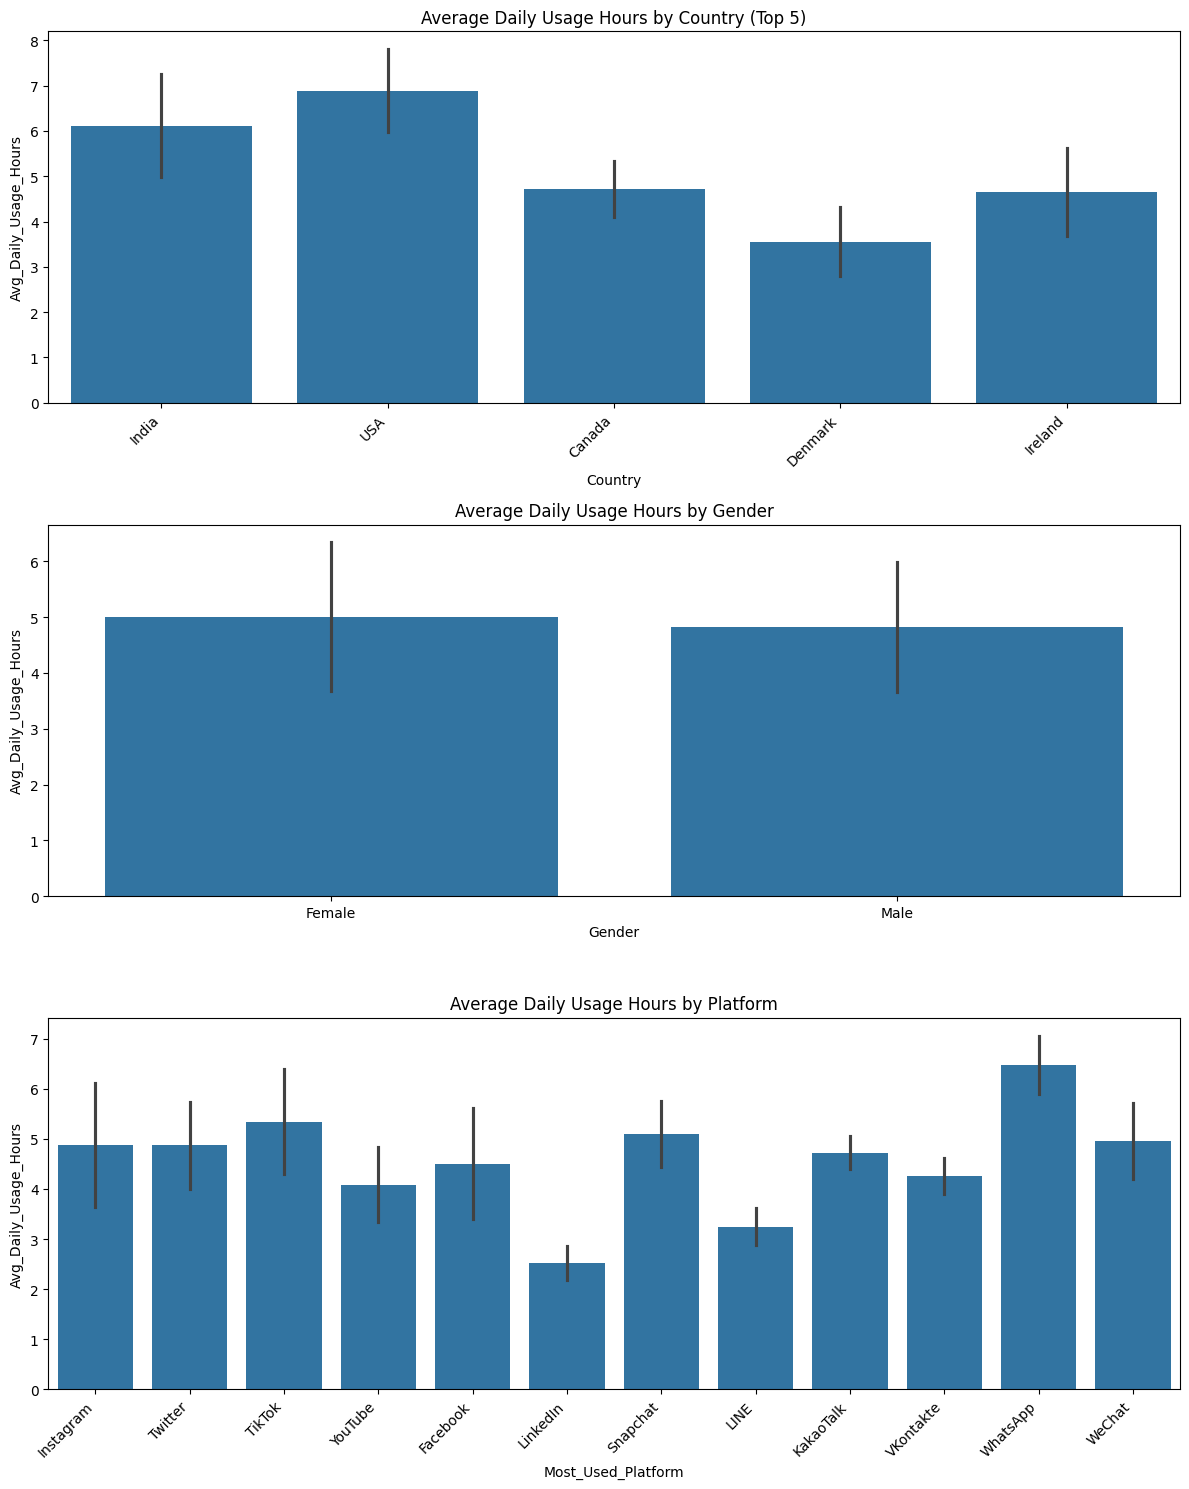


Average Daily Usage Hours Statistics:

By Country (Top 5):
India: 6.12 hours (n=53)
USA: 6.89 hours (n=40)
Canada: 4.71 hours (n=34)
Denmark: 3.56 hours (n=27)
Ireland: 4.65 hours (n=27)

By Gender:
Female: 5.01 hours (n=353)
Male: 4.83 hours (n=352)

By Platform:
Instagram: 4.87 hours (n=249)
Twitter: 4.87 hours (n=30)
TikTok: 5.35 hours (n=154)
YouTube: 4.08 hours (n=10)
Facebook: 4.51 hours (n=123)
LinkedIn: 2.52 hours (n=21)
Snapchat: 5.09 hours (n=13)
LINE: 3.25 hours (n=12)
KakaoTalk: 4.72 hours (n=12)
VKontakte: 4.25 hours (n=12)
WhatsApp: 6.48 hours (n=54)
WeChat: 4.96 hours (n=15)


In [93]:
# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# 1. Average Daily Usage by Country (top 5 countries)
top_5_countries = df['Country'].value_counts().nlargest(5).index
country_data = df[df['Country'].isin(top_5_countries)]

sns.barplot(data=country_data, 
           x='Country', 
           y='Avg_Daily_Usage_Hours',
           errorbar='sd',  # Show standard deviation
           ax=ax1)
ax1.set_title('Average Daily Usage Hours by Country (Top 5)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# 2. Average Daily Usage by Gender
sns.barplot(data=df,
           x='Gender',
           y='Avg_Daily_Usage_Hours',
           errorbar='sd',
           ax=ax2)
ax2.set_title('Average Daily Usage Hours by Gender')

# 3. Average Daily Usage by Platform
sns.barplot(data=df,
           x='Most_Used_Platform',
           y='Avg_Daily_Usage_Hours',
           errorbar='sd',
           ax=ax3)
ax3.set_title('Average Daily Usage Hours by Platform')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

# Print average values and sample sizes
print('\nAverage Daily Usage Hours Statistics:\n')

# By Country (top 5)
print('By Country (Top 5):')
for country in top_5_countries:
    avg = df[df['Country'] == country]['Avg_Daily_Usage_Hours'].mean()
    count = df[df['Country'] == country].shape[0]
    print(f'{country}: {avg:.2f} hours (n={count})')

# By Gender
print('\nBy Gender:')
for gender in df['Gender'].unique():
    avg = df[df['Gender'] == gender]['Avg_Daily_Usage_Hours'].mean()
    count = df[df['Gender'] == gender].shape[0]
    print(f'{gender}: {avg:.2f} hours (n={count})')

# By Platform
print('\nBy Platform:')
for platform in df['Most_Used_Platform'].unique():
    avg = df[df['Most_Used_Platform'] == platform]['Avg_Daily_Usage_Hours'].mean()
    count = df[df['Most_Used_Platform'] == platform].shape[0]
    print(f'{platform}: {avg:.2f} hours (n={count})')

## Boxplots: Addicted Score by Academic Level and Platform
Visualize the distribution of Addicted_Score across Academic_Level and Most_Used_Platform to compare medians and spread.

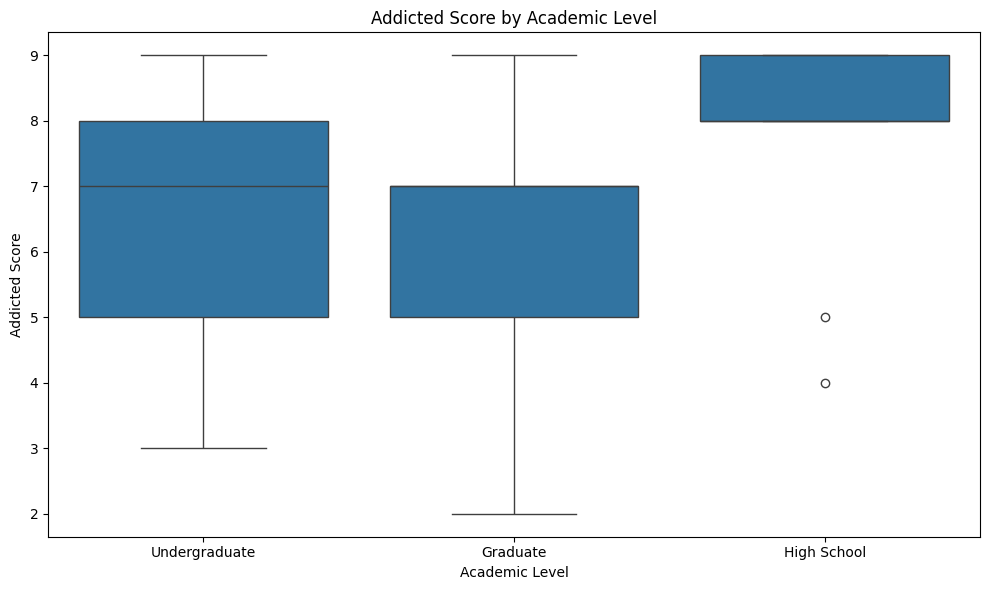

In [94]:
# Boxplot: Addicted_Score by Academic_Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Academic_Level', y='Addicted_Score')
plt.title('Addicted Score by Academic Level')
plt.xlabel('Academic Level')
plt.ylabel('Addicted Score')
plt.tight_layout()
plt.show()

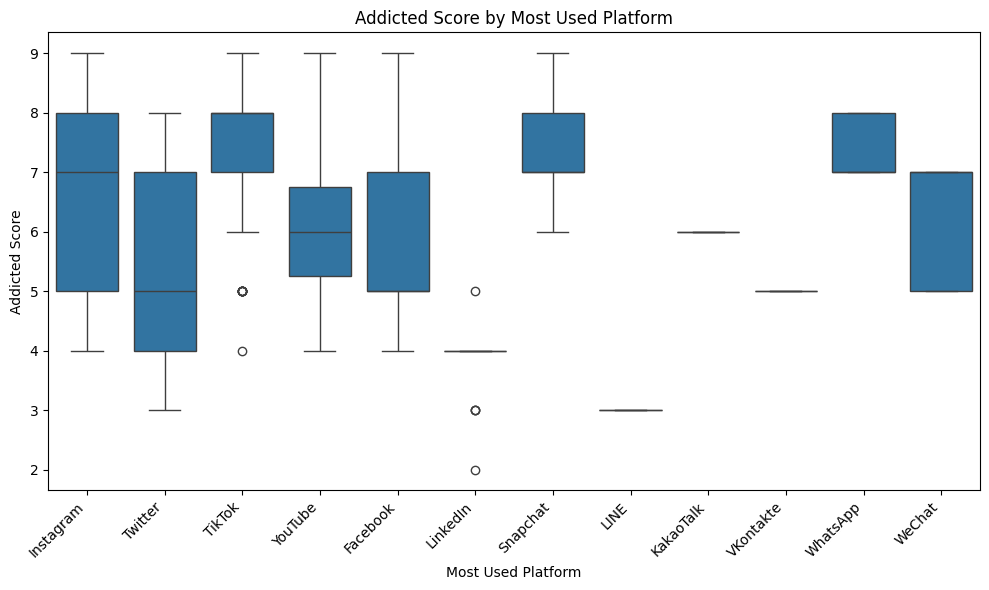

In [29]:
# Boxplot: Addicted_Score by Most_Used_Platform
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Most_Used_Platform', y='Addicted_Score')
plt.title('Addicted Score by Most Used Platform')
plt.xlabel('Most Used Platform')
plt.ylabel('Addicted Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
score_by_country = df.groupby('Country')['Addicted_Score'].mean().reset_index()

fig = px.choropleth(
    score_by_country,
    locations='Country',
    locationmode='country names',
    color='Addicted_Score',
    color_continuous_scale='Cividis',
    title="Average Addicted Score by Country"
)
fig.show()

## Analysis: Distribution of Target Variables Across Demographics and Behaviors

In [63]:
top_5_countries = df['Country'].value_counts().head(5).index.tolist()

In [ ]:
summary_conflicts = []
for country in top_5_countries:
    subset = df[df['Country'] == country]["Conflicts_Over_Social_Media_Binary"]
    summary_conflicts.append({
        'Country': country,
        'Respondents': subset.shape[0],
        'Mean Conflicts': subset.mean(),
        'Median Conflicts': subset.median()
    })
import pandas as pd
summary_df_conflicts = pd.DataFrame(summary_conflicts)
summary_df_conflicts

,Country,Respondents,Mean Conflicts,Median Conflicts
0,India,53,0.792453,1.0
1,USA,40,1.000000,1.0
2,Canada,34,0.941176,1.0
3,Denmark,27,0.000000,0.0
4,Ireland,27,1.000000,1.0


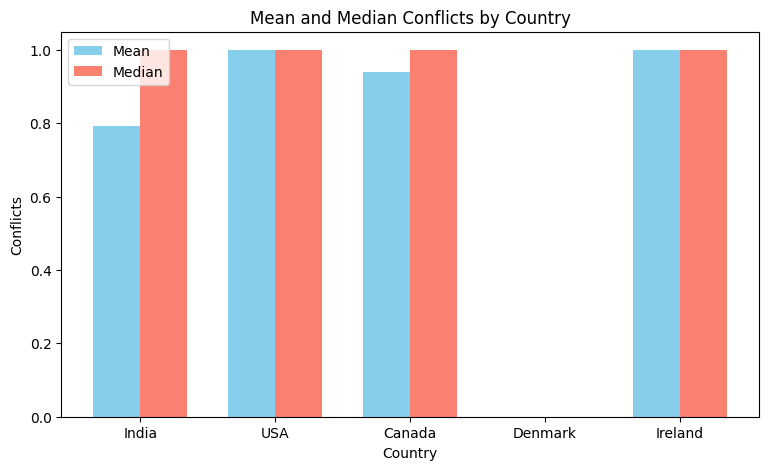

In [70]:
x = np.arange(len(summary_df_conflicts['Country']))  # the label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(9,5))
rects1 = ax.bar(x - width/2, summary_df_conflicts['Mean Conflicts'], width, label='Mean', color='skyblue')
rects2 = ax.bar(x + width/2, summary_df_conflicts['Median Conflicts'], width, label='Median', color='salmon')

ax.set_ylabel('Conflicts')
ax.set_xlabel('Country')
ax.set_title('Mean and Median Conflicts by Country')
ax.set_xticks(x)
ax.set_xticklabels(summary_df_conflicts['Country'])
ax.legend()

plt.show()

In [71]:
summary_addicted_score = []
for country in top_5_countries:
    subset = df[df['Country'] == country]['Addicted_Score']
    summary_addicted_score.append({
        'Country': country,
        'Respondents': subset.shape[0],
        'Mean Addicted Score': subset.mean(),
        'Median Addicted Score': subset.median()
    })
import pandas as pd
summary_df_addicted_score = pd.DataFrame(summary_addicted_score)

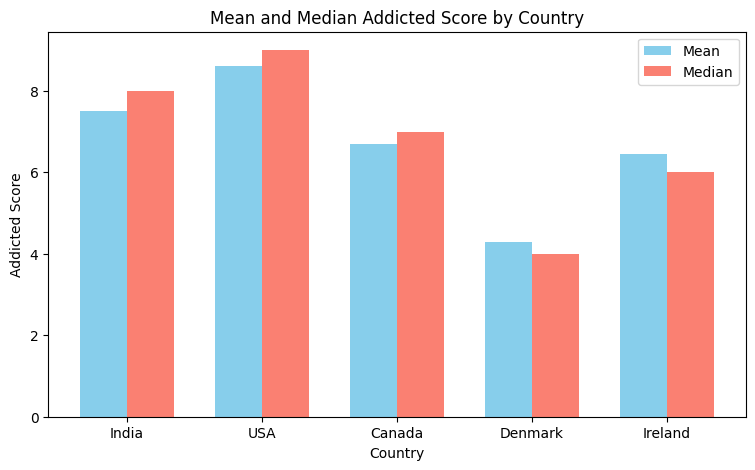

In [72]:
x = np.arange(len(summary_df_addicted_score['Country']))  # the label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(9,5))
rects1 = ax.bar(x - width/2, summary_df_addicted_score['Mean Addicted Score'], width, label='Mean', color='skyblue')
rects2 = ax.bar(x + width/2, summary_df_addicted_score['Median Addicted Score'], width, label='Median', color='salmon')

ax.set_ylabel('Addicted Score')
ax.set_xlabel('Country')
ax.set_title('Mean and Median Addicted Score by Country')
ax.set_xticks(x)
ax.set_xticklabels(summary_df_addicted_score['Country'])
ax.legend()

plt.show()